# Task Selection for MTEB(Indic)


In [1]:
from __future__ import annotations

import mteb

print(mteb.__version__)

/Users/au561649/.virtualenvs/mteb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.48


## Loading in data
We will start out by loading in the relevant data for the model and tasks of interests.

In [2]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [3]:
# load tasks
indic_languages = [
    "asm",
    "awa",
    "ben",
    "bgc",
    "bho",
    "doi",
    "gbm",
    "gom",
    "guj",
    "hin",
    "hne",
    "kan",
    "kas",
    "mai",
    "mal",
    "mar",
    "mni",
    "mup",
    "mwr",
    "nep",
    "npi",
    "ori",
    "ory",
    "pan",
    "raj",
    "san",
    "snd",
    "tam",
    "tel",
    "urd",
]


indic_tasks = mteb.get_tasks(
    languages=indic_languages,
)  # does not need to language - you can also filter by task types, domains, etc.

print(f"Number of tasks: {len(indic_tasks)}")

Number of tasks: 55


In [4]:
not_include = [
    "MSMARCO",  # too large
    # was added after models were run
    "XStance",
    "MIRACLReranking",
    "HinDialectClassification",
    "IndicNLPNewsClassification",
    "SIB200Classification",  # we will be using the SIB200 dataset for Cluster Classification so as they are the same dataset we will not include this one
    # to be downsampled
    "MIRACLRetrieval",
]

indic_tasks = [t for t in indic_tasks if t.metadata.name not in not_include]
# exlude machine translated tasks
indic_tasks = [
    t
    for t in indic_tasks
    if t.metadata.sample_creation
    not in [
        "machine-translated",
        "machine-translated and verified",
        "machine-translated and localized",
    ]
]

print(f"Number of tasks after filtering: {len(indic_tasks)}")

Number of tasks after filtering: 46


# Load data

In [5]:
# load results from mteb/results repository
mteb_results = mteb.load_results(
    models=models, tasks=indic_tasks, download_latest=False
)

In [6]:
mteb_results

{'intfloat/multilingual-e5-small': {'e4ce9877abf3edfe10b0d82785e83bdcb973e22e': [MTEBResults(task_name=IndicGenBenchFloresBitextMining, scores=...),
   MTEBResults(task_name=GujaratiNewsClassification, scores=...),
   MTEBResults(task_name=MTOPDomainClassification, scores=...),
   MTEBResults(task_name=IndicLangClassification, scores=...),
   MTEBResults(task_name=BengaliHateSpeechClassification, scores=...),
   MTEBResults(task_name=FloresBitextMining, scores=...),
   MTEBResults(task_name=MultiHateClassification, scores=...),
   MTEBResults(task_name=IN22GenBitextMining, scores=...),
   MTEBResults(task_name=MultilingualSentimentClassification, scores=...),
   MTEBResults(task_name=XQuADRetrieval, scores=...),
   MTEBResults(task_name=TamilNewsClassification, scores=...),
   MTEBResults(task_name=NepaliNewsClassification, scores=...),
   MTEBResults(task_name=UrduRomanSentimentClassification, scores=...),
   MTEBResults(task_name=SemRel24STS, scores=...),
   MTEBResults(task_name=Mas

In [7]:
import mteb.task_selection as task_selection

results_df = task_selection.results_to_dataframe(
    mteb_results, drop_na=False, languages=indic_languages
)

In [8]:
results_df.head()  # inspect the dataframe

,task,BelebeleRetrieval,BengaliDocumentClassification,BengaliHateSpeechClassification,BengaliSentimentAnalysis,BibleNLPBitextMining,FloresBitextMining,GujaratiNewsClassification,HindiDiscourseClassification,IN22ConvBitextMining,IN22GenBitextMining,...,TamilNewsClassification,Tatoeba,TeluguAndhraJyotiNewsClassification,TweetSentimentClassification,UrduRomanSentimentClassification,WikipediaRerankingMultilingual,WikipediaRetrievalMultilingual,XNLI,XPQARetrieval,XQuADRetrieval
model,revision,,,,,,,,,,,,,,,,,,,,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.651366,0.419482,0.548942,0.721005,0.726886,0.638675,0.698558,0.370898,0.380802,0.676261,...,0.311205,0.690237,0.616112,0.375781,0.496861,0.846951,0.832380,0.665936,0.397125,0.88930
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.614661,0.435547,0.497658,0.720748,0.759505,0.637100,0.730880,0.320068,0.403273,0.668236,...,0.313787,0.711112,0.654907,0.379297,0.494694,0.844201,0.825875,0.716875,0.377082,0.88243
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.650504,0.518994,0.485035,0.796431,0.800805,0.825293,0.749090,0.390381,0.547230,0.748925,...,0.391938,0.857164,0.786698,0.380469,0.403741,0.837615,0.829165,0.721940,0.394047,0.95313
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.739715,0.540234,0.487615,0.830707,0.804803,0.855500,0.767375,0.387402,0.588946,0.775150,...,0.424952,0.881030,0.792410,0.364063,0.416054,0.859706,0.860075,0.740601,0.437062,0.97010
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.762216,0.496533,0.584896,0.839849,0.844991,0.905643,0.875190,0.352344,0.632050,0.795942,...,0.485856,0.935997,0.796409,0.373828,0.438792,0.874621,0.865210,0.756606,0.440010,0.95971


In [9]:
# which tasks are missing?
missing_tasks = results_df[results_df.isna().any(axis=1)]
missing_tasks = missing_tasks.loc[:, missing_tasks.isna().any()]
missing_tasks  # should be empty

,task
model,revision


# Task Selection

In this section we will do the task selection to construct a benchmark.

In [10]:
# tasks with exactly the same results for all models (i.e. columns where all values are the same)
same_results = results_df.loc[:, results_df.nunique() == 1]
same_results

,task
model,revision
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a
intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e
sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7
sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854
sentence-transformers/all-MiniLM-L6-v2,8b3219a92973c328a8e22fadcfa821b5dc75636a


In [11]:
# remove these tasks from the tasks
print(f"Number of tasks before removing tasks with same results: {len(indic_tasks)}")
indic_tasks = [t for t in indic_tasks if t.metadata.name not in same_results.columns]
print(f"Number of tasks after removing tasks with same results: {len(indic_tasks)}")

Number of tasks before removing tasks with same results: 46
Number of tasks after removing tasks with same results: 46


In [12]:
licenses_to_remove = ["Not specified", "Unknown"]  # remove tasks with unknown licenses
# Note: this implicitly penalizes low-resource languages, as they are more likely to have unknown licenses - though this is probably still a reasonable choice
unspecified_licences = [
    t for t in indic_tasks if t.metadata.license in licenses_to_remove
]
[print(l) for l in unspecified_licences]
print("-")

LinceMTBitextMining(name='LinceMTBitextMining', languages=['eng', 'hin'])
LanguageClassification(name='LanguageClassification', languages=['ara', 'bul', 'cmn', '...'])
MTOPDomainClassification(name='MTOPDomainClassification', languages=['hin'])
MTOPIntentClassification(name='MTOPIntentClassification', languages=['hin'])
MultilingualSentimentClassification(name='MultilingualSentimentClassification', languages=['urd'])
XNLI(name='XNLI', languages=['hin'])
SemRel24STS(name='SemRel24STS', languages=['hin', 'mar', 'tel'])
-


In [13]:
exceptions = [
    "LinceMTBitextMining",
    "SemRel24STS",
    "XNLI",  # assume that semrel task are fair use
    "MTOPDomainClassification",
    "MTOPIntentClassification",
]
remove_due_to_license = [
    t for t in unspecified_licences if t.metadata.name not in exceptions
]
remove_due_to_license = [t.metadata.name for t in remove_due_to_license]
remove_due_to_license

['LanguageClassification', 'MultilingualSentimentClassification']

In [14]:
print(f"Number of tasks before: {len(indic_tasks)}")
indic_tasks = [t for t in indic_tasks if t.metadata.name not in remove_due_to_license]
print(f"Number of tasks after: {len(indic_tasks)}")

Number of tasks before: 46
Number of tasks after: 44


In [15]:
# remove legal bench tasks
# and code tasks
# Note: none of these tasks are included so we can just skip it.

### Iterative Automated Task Selection 

In [16]:
# tasks which should be kept, e.g. due to them being known high quality datasets, unique tasks, etc.
tasks_to_keep = [
    # dataset with good coverage of languages and of reasonable quality
    # "HinDialectClassification",
    # "IndicNLPNewsClassification",
    "IN22ConvBitextMining",
    "IN22GenBitextMining",
    "IndicGenBenchFloresBitextMining",
    "IndicLangClassification",
    "IndicCrosslingualSTS",
    "LinceMTBitextMining",
]


_langs = set(indic_languages)


def is_candidate_valid_removal(current_tasks: list[str], task_to_remove: str) -> bool:
    """Determine if target task should be removed.
    This checks that all task types are present in the current tasks or whether the task is in the tasks_to_keep list.
    This is all conducted within language.
    """
    if task_to_remove in tasks_to_keep:
        return False

    # check if removing task removes a unique task type - if so, don't remove
    _current_tasks = current_tasks.copy()
    if task_to_remove in _current_tasks:
        _current_tasks.remove(task_to_remove)
    task = mteb.get_task(task_to_remove)
    ctasks = mteb.get_tasks(tasks=_current_tasks)

    # don't remove a unique task type
    task_types = {t.metadata.type for t in ctasks}
    if task.metadata.type not in task_types:
        return False

    # check that removing the task does not remove a unique task type within the language
    _languages_covered_by_task_type = [
        t.metadata.languages for t in ctasks if t.metadata.type == task.metadata.type
    ]
    languages_covered_by_task_type = {
        lang for sublist in _languages_covered_by_task_type for lang in sublist
    }
    # reduce to eu languages
    languages_covered_by_task_type = languages_covered_by_task_type & _langs

    task_langs = set(task.metadata.languages) & _langs

    if not task_langs.issubset(languages_covered_by_task_type):
        return False

    return True

In [17]:
from sklearn.linear_model import LinearRegression

# remove tasks one by one
tasks_to_select_from = [t.metadata.name for t in indic_tasks]

tasks_removed = []
predicability_scores = []

while tasks_to_select_from:
    most_pred_tasks = task_selection.most_predictable_task(
        results_df[tasks_to_select_from],
        sklearn_estimator=LinearRegression(),
        metrics=[
            task_selection.spearman,
            task_selection.pearson,
            task_selection.mse_with_zscore,
        ],
    )

    # reverse the list to get the least predictable task
    most_pred_tasks.reverse()

    while most_pred_tasks:
        most_pred_task = most_pred_tasks.pop()
        most_pred_task_name = list(most_pred_task.keys())[0]

        # if the task is too hard to predict, skip it (this essentially stops the loop)
        if (
            most_pred_task[most_pred_task_name]["mse_with_zscore"] > 0.5
            or most_pred_task[most_pred_task_name]["spearman"] < 0.8
        ):
            print("Threshold reached")
            continue

        cand_removal = is_candidate_valid_removal(
            tasks_to_select_from, most_pred_task_name
        )

        if cand_removal:
            tasks_to_select_from.remove(most_pred_task_name)
            tasks_removed.append(most_pred_task_name)
            predicability_scores.append(most_pred_task[most_pred_task_name])
            break
        else:
            print(f"Task {most_pred_task_name} is not a valid candidate for removal")

    if not most_pred_tasks:  # if no task was removed, then we are done -- can be replaced with another stopping criterion
        break

Task: SemRel24STS: 100%|██████████| 44/44 [00:00<00:00, 67.54it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 43/43 [00:00<00:00, 78.31it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 42/42 [00:00<00:00, 68.35it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 41/41 [00:00<00:00, 72.58it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 40/40 [00:00<00:00, 69.07it/s]                        


Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22GenBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 39/39 [00:00<00:00, 71.52it/s]                        


Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22GenBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 38/38 [00:00<00:00, 71.72it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 37/37 [00:00<00:00, 75.46it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 36/36 [00:00<00:00, 75.47it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 35/35 [00:00<00:00, 68.08it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 34/34 [00:00<00:00, 71.83it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal


Task: SemRel24STS: 100%|██████████| 33/33 [00:00<00:00, 72.40it/s]                        


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 32/32 [00:00<00:00, 70.50it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 31/31 [00:00<00:00, 72.52it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 30/30 [00:00<00:00, 72.86it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 29/29 [00:00<00:00, 73.24it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 28/28 [00:00<00:00, 72.68it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 27/27 [00:00<00:00, 71.63it/s]               


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 26/26 [00:00<00:00, 73.27it/s]            


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 25/25 [00:00<00:00, 72.95it/s]            


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 24/24 [00:00<00:00, 72.80it/s]            


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal


Task: IndicCrosslingualSTS: 100%|██████████| 23/23 [00:00<00:00, 72.96it/s]            


Task IN22GenBitextMining is not a valid candidate for removal
Task IndicGenBenchFloresBitextMining is not a valid candidate for removal
Task WikipediaRerankingMultilingual is not a valid candidate for removal
Task IN22ConvBitextMining is not a valid candidate for removal
Task LinceMTBitextMining is not a valid candidate for removal
Task IndicCrosslingualSTS is not a valid candidate for removal
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached
Threshold reached


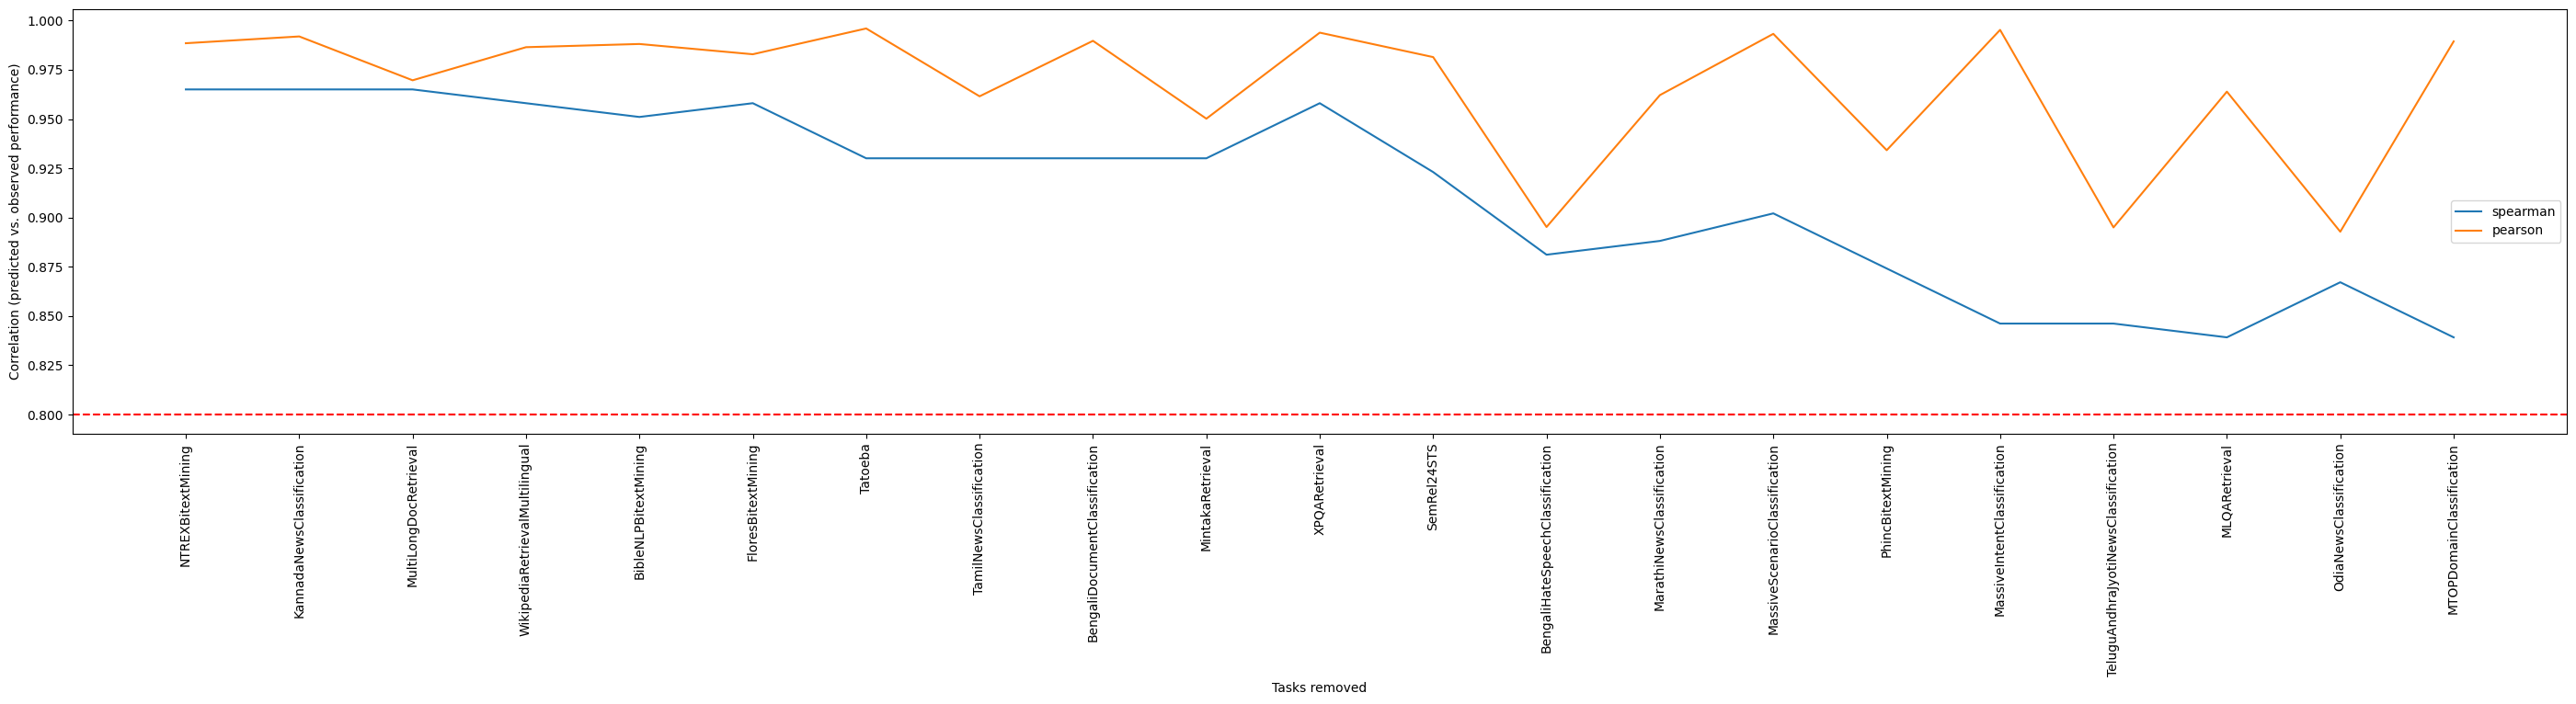

In [18]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

# make the plot wider
plt.figure(figsize=(35, 6))

for metric in ["spearman", "pearson"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Correlation (predicted vs. observed performance)")
plt.legend()

# add vline for 0.8 spearman
plt.axhline(y=0.8, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

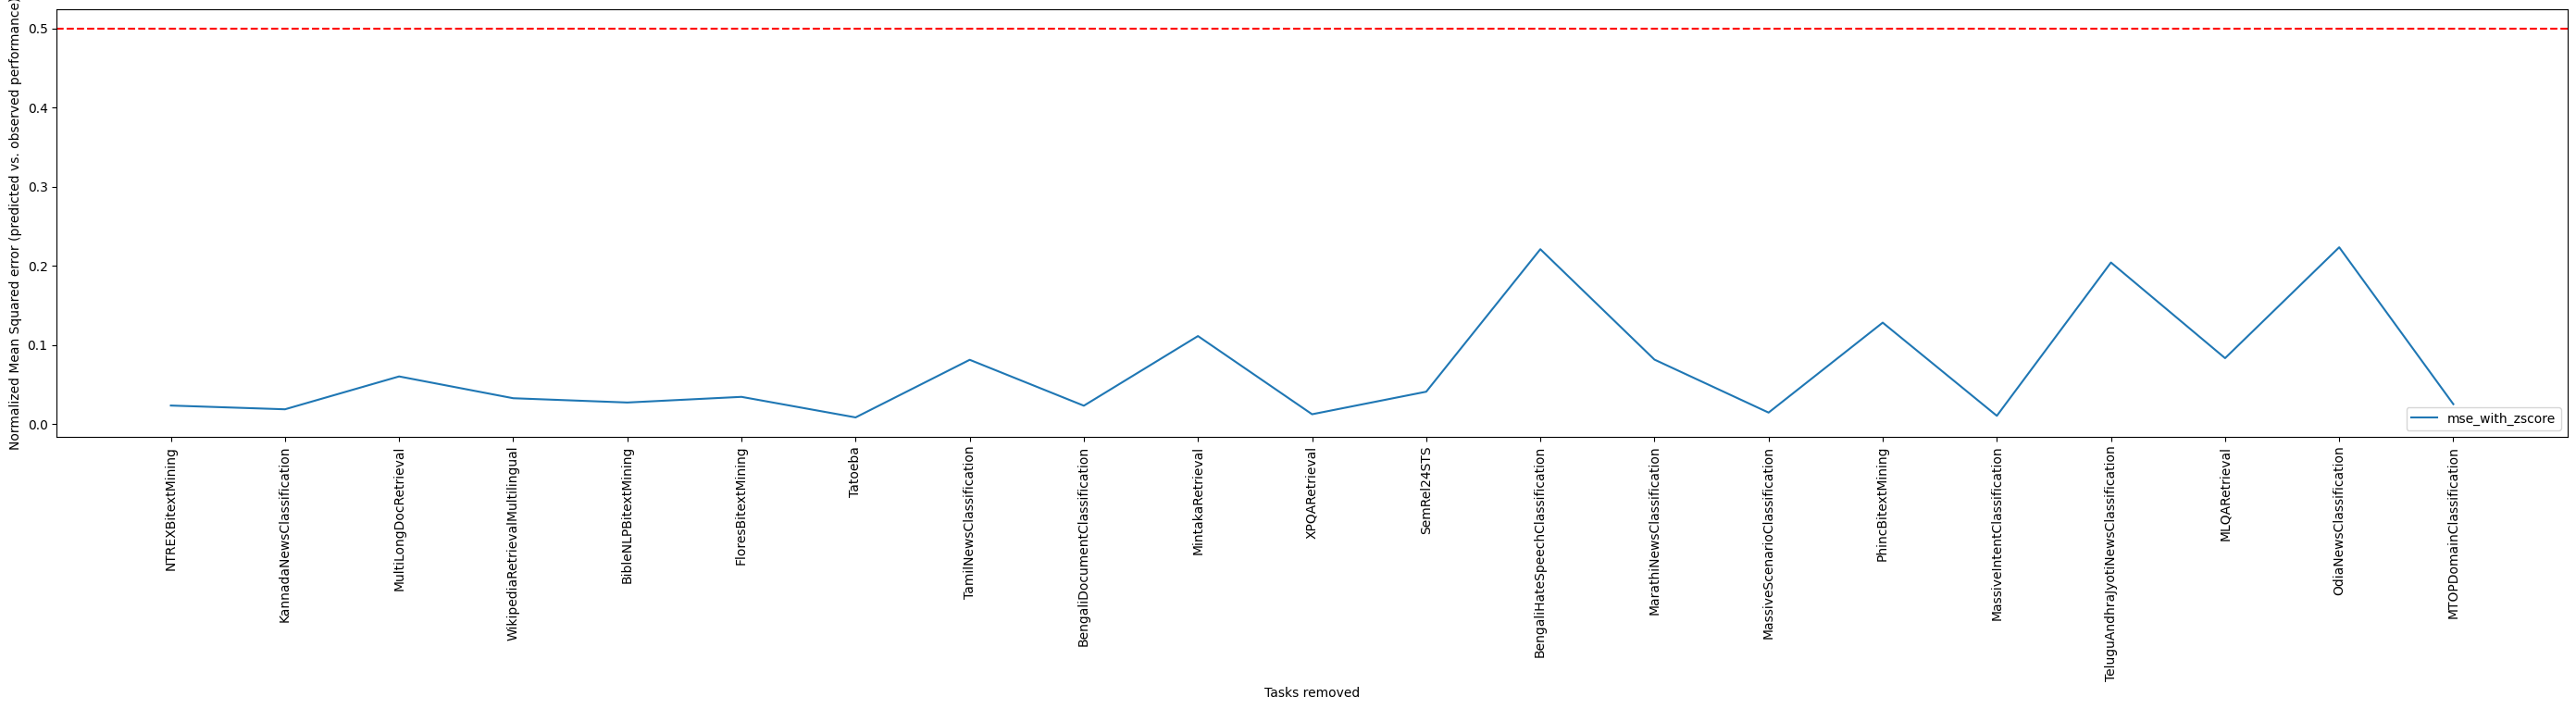

In [19]:
# plotting the predictability scores with the tasks removed

plt.figure(figsize=(35, 6))

for metric in ["mse_with_zscore"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Normalized Mean Squared error (predicted vs. observed performance)")
plt.legend()

# add vline for 0.5 mse
plt.axhline(y=0.5, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

## Constructing the Benchmark

In [28]:
# we now have the tasks:
tasks_to_select_from

['IN22ConvBitextMining',
 'IN22GenBitextMining',
 'IndicGenBenchFloresBitextMining',
 'LinceMTBitextMining',
 'BengaliSentimentAnalysis',
 'GujaratiNewsClassification',
 'HindiDiscourseClassification',
 'SentimentAnalysisHindi',
 'MalayalamNewsClassification',
 'IndicLangClassification',
 'MTOPIntentClassification',
 'MultiHateClassification',
 'TweetSentimentClassification',
 'NepaliNewsClassification',
 'PunjabiNewsClassification',
 'SanskritShlokasClassification',
 'UrduRomanSentimentClassification',
 'SIB200ClusteringS2S',
 'BelebeleRetrieval',
 'XQuADRetrieval',
 'XNLI',
 'WikipediaRerankingMultilingual',
 'IndicCrosslingualSTS']

In [41]:
tasks = mteb.get_tasks(tasks=tasks_to_select_from, languages=list(indic_languages))

# we can now create a benchmark
benchmark = mteb.Benchmark(
    name="MTEB(Indic)",
    tasks=tasks,
    description="Benchmark for evaluating document embedding models for Indic languages",
    citation="",
    reference="",
)

In [42]:
# create a dataframe with tasks
import pandas as pd

data = []

_langs = set(indic_languages)

for t in tasks:
    data.append(
        {
            "Name": t.metadata.name,
            "Type": t.metadata.type,
            "Languages": set(t.metadata.languages) & _langs,
            "Domains": t.metadata.domains,
            "License": t.metadata.license,
            "Description": t.metadata.description,
        }
    )

tasks_df = pd.DataFrame(data)
# tasks_df

# print all rows
pd.set_option("display.max_rows", 100)
_tasks_df = tasks_df.set_index(["Type", "Name"], inplace=False)
_tasks_df

Languages  \
Type               Name                                                                                  
BitextMining       IN22ConvBitextMining              {ory, kas, asm, snd, hin, mar, tam, san, kan, ...   
                   IN22GenBitextMining               {ory, kas, asm, snd, hin, mar, tam, san, kan, ...   
                   IndicGenBenchFloresBitextMining   {ory, asm, gbm, hin, nep, mar, tam, bgc, mup, ...   
                   LinceMTBitextMining                                                           {hin}   
Classification     BengaliSentimentAnalysis                                                      {ben}   
                   GujaratiNewsClassification                                                    {guj}   
                   HindiDiscourseClassification                                                  {hin}   
                   SentimentAnalysisHindi                                                        {hin}   
                   MalayalamNewsClassification                                                   {mal}   
                   IndicLangClassification           {ory, kas, asm, snd, hin, mar, tam, san, kan, ...   
                   MTOPIntentClassification                                                      {hin}   
                   MultiHateClassification                                                       {hin}   
                   TweetSentimentClassification                                                  {hin}   
                   NepaliNewsClassification                                                      {nep}   
                   PunjabiNewsClassification                                                     {pan}   
                   SanskritShlokasClassification                                                 {san}   
                   UrduRomanSentimentClassification                                              {urd}   
Clustering         SIB200ClusteringS2S               {ory, kas, asm, snd, hin, mar, tam, san, kan, ...   
Retrieval          BelebeleRetrieval                 {mal, ory, ben, mar, tam, npi, guj, asm, snd, ...   
                   XQuADRetrieval                                                                {hin}   
PairClassification XNLI                                                                          {hin}   
Reranking          WikipediaRerankingMultilingual                                           {hin, ben}   
STS                IndicCrosslingualSTS              {mal, ory, ben, mar, tam, guj, asm, kan, urd, ...   

                                                                                               Domains  \
Type               Name                                                                                  
BitextMining       IN22ConvBitextMining                              [Social, Spoken, Fiction, Spoken]   
                   IN22GenBitextMining               [Web, Legal, Government, News, Religious, Non-...   
                   IndicGenBenchFloresBitextMining                                [Web, News, Written]   
                   LinceMTBitextMining                                               [Social, Written]   
Classification     BengaliSentimentAnalysis                                         [Reviews, Written]   
                   GujaratiNewsClassification                                          [News, Written]   
                   HindiDiscourseClassification                             [Fiction, Social, Written]   
                   SentimentAnalysisHindi                                           [Reviews, Written]   
                   MalayalamNewsClassification                                         [News, Written]   
                   IndicLangClassification                                 [Web, Non-fiction, Written]   
                   MTOPIntentClassification                                           [Spoken, Spoken]   
                   MultiHateClassification                      

In [43]:
_tasks_df.shape

(23, 4)

In [44]:
tasks_df.to_csv("indic_tasks.csv")

# Benchmark Performance

In [9]:
# It is possible to start the notebok from here:
import pandas as pd

import mteb

_df = pd.read_csv("indic_tasks.csv")
task_names = _df["Name"].tolist()

indic_languages = [
    "asm",
    "awa",
    "ben",
    "bgc",
    "bho",
    "doi",
    "gbm",
    "gom",
    "guj",
    "hin",
    "hne",
    "kan",
    "kas",
    "mai",
    "mal",
    "mar",
    "mni",
    "mup",
    "mwr",
    "nep",
    "npi",
    "ori",
    "ory",
    "pan",
    "raj",
    "san",
    "snd",
    "tam",
    "tel",
    "urd",
]


indic_tasks = mteb.get_tasks(tasks=task_names, languages=indic_languages)

In [10]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [11]:
# load task results for the specified models from mteb/results repository
mteb_results = mteb.load_results(
    models=models, tasks=indic_tasks, download_latest=False
)

In [12]:
import mteb.task_aggregation as task_aggregation

mean = task_aggregation.mean(mteb_results)
weighted_mean = task_aggregation.task_category_weighted_mean(mteb_results)
borda = task_aggregation.borda_count(mteb_results)

In [13]:
import pandas as pd

data = []
for model_name, revisions in borda.items():
    for rev, avg_score in revisions.items():
        total_eval_time = sum(
            res.evaluation_time for res in mteb_results[model_name][rev]
        )

        data.append(
            {
                "model": model_name,
                "revision": rev,
                **mean[model_name][rev],
                **weighted_mean[model_name][rev],
                **avg_score,
                "Total Evaluation time (hours)": total_eval_time / 3600,
            }
        )

df = pd.DataFrame(data)
df = df.sort_values("borda_count", ascending=False)
# round
df = df.round(3)

df.to_csv("indic_results.csv")

In [15]:
latex_df = df.drop(columns=["revision"])
latex_df["model"] = [name.split("/")[1] for name in latex_df["model"]]
latex_df = latex_df.set_index("model")

latex_df["mean (MultilabelClassification)"] = None

avg_cols = [
    "mean",
    "mean (BitextMining)",
    "mean (PairClassification)",
    "mean (Classification)",
    "mean (STS)",
    "mean (Retrieval)",
    "mean (MultilabelClassification)",
    "mean (Clustering)",
    "mean (Reranking)",
    "mean (wieghted by task type)",
]

borda_col_name = "borda_count"

# multiply by 100 to get percentage values and round to 2 decimal places
latex_df[avg_cols] = latex_df[avg_cols] * 100

latex_df["Rank (Borda Count)"] = [
    f"{rank} ({borda:.0f})"
    for rank, borda in zip(range(1, len(latex_df) + 1), latex_df[borda_col_name])
]
latex_df = latex_df.drop(columns=[borda_col_name])


# column order and rename
cols = [
    "Rank (Borda Count)",
    "mean",
    "mean (wieghted by task type)",
    "mean (BitextMining)",
    "mean (PairClassification)",
    "mean (Classification)",
    "mean (STS)",
    "mean (Retrieval)",
    "mean (MultilabelClassification)",
    "mean (Clustering)",
    "mean (Reranking)",
]

latex_df = latex_df[cols]

table_latex = latex_df.to_latex(index=True, float_format="%.2f")


print(table_latex)

\begin{tabular}{llrrrrrrrlrr}
\toprule
 & Rank (Borda Count) & mean & mean (wieghted by task type) & mean (BitextMining) & mean (PairClassification) & mean (Classification) & mean (STS) & mean (Retrieval) & mean (MultilabelClassification) & mean (Clustering) & mean (Reranking) \\
model &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
multilingual-e5-large-instruct & 1 (224) & 71.80 & 71.50 & 70.30 & 78.50 & 70.90 & 53.70 & 88.70 & NaN & 47.20 & 91.00 \\
multilingual-e5-large & 2 (190) & 64.50 & 63.70 & 64.40 & 73.90 & 63.10 & 43.90 & 87.50 & NaN & 23.70 & 89.70 \\
GritLM-7B & 3 (165) & 64.60 & 62.50 & 60.70 & 74.10 & 65.20 & 27.20 & 83.20 & NaN & 36.10 & 91.00 \\
multilingual-e5-base & 4 (164) & 62.50 & 61.10 & 61.20 & 71.00 & 61.90 & 41.10 & 83.30 & NaN & 21.60 & 87.70 \\
e5-mistral-7b-instruct & 5 (154) & 63.70 & 62.30 & 61.60 & 77.90 & 63.60 & 23.00 & 80.80 & NaN & 38.70 & 90.30 \\
multilingual-e5-small & 6 (150) & 61.90 & 60.60 & 61.20 & 69.00 & 61.30 & 40.80 & 80.80 & NaN & 23.90 & 87

In [16]:
from collections import Counter

Counter([task.metadata.type for task in indic_tasks])

Counter({'BitextMining': 4,
         'Classification': 13,
         'Clustering': 1,
         'Retrieval': 2,
         'PairClassification': 1,
         'Reranking': 1,
         'STS': 1})

In [17]:
len(indic_tasks)

23